In [ ]:
import sys
!{sys.executable} -m pip install qiskit qiskit_ibm_runtime numpy matplotlib pylatexenc pdflatex qiskit-aer

In [1]:
import matplotlib.pyplot as plt, numpy as np, cmath, math
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_vector, plot_bloch_multivector
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options, Sampler
from qiskit_aer import AerSimulator
from qiskit import *
from numpy import linalg as la
from numpy.linalg import norm
%matplotlib inline

KeyboardInterrupt: 

In [ ]:
from qiskit import*
import numpy as np
from numpy import linalg as la
from numpy.linalg import norm
import matplotlib.pyplot as plt
import math
import cmath

In [ ]:
def C(M,vec,n,t):
    aux = (norm(vec)*(t)**n)/np.math.factorial(n)
    return aux

def D(M,vec,n,t):
    aux=(norm(vec)*(t)**(n-1))*t/np.math.factorial(n)
    return aux

def CG(num,vec,n,t):
    aux=(norm(vec)*((num*t)**n))/np.math.factorial(n)
    return aux

def DG(num,vec,n,t):
    aux=(norm(vec)*((num*t)**(n-1))*t)/np.math.factorial(n)
    return aux

In [ ]:
def gbin(dig: int, num: float):
    """
    Generates a binary number.
    
    Parameters:
    dig (int): The desired length of the binary number.
    num (float): The decimal number to convert to binary.
    
    Returns:
    list: A list representing the binary representation of the given decimal number with the specified length.
    """
    gbin = [int(x) for x in list('{0:0b}'.format(num))]
    
    for j in range(dig - len(gbin)):
        aux = [0] + gbin
        gbin = aux
    
    return gbin

In [ ]:
def zeros(M):
    """
    Generates a zeros matrix.
    
    Parameters:
    M (int): The size of the square matrix.
    
    Returns:
    numpy.ndarray: A zeros matrix of size MxM.
    """
    a = [0.0]
    for i in range(M - 1):
        a = a + [0.0]
    
    b = [a]
    for i in range(M - 1):
        c = np.concatenate((b, [a]), axis=0)
        b = c
    
    return c

In [ ]:
def uoseq(n, m):
    """
    Creates an unordered sequence.

    Parameters:
    n (int): The starting value of the sequence.
    m (int): The length of the sequence.

    Returns:
    list: An unordered sequence of length m, starting from n and decreasing.
    """

    v = [n]
    for i in range(m - 1):
        v = v + [n - i - 1]
    return v

In [ ]:
def oseq(init, fin):
    """
    Creates an ordered sequence.
    
    Parameters:
    init (int): The initial value of the sequence.
    fin (int): The final value of the sequence.
    
    Returns:
    list: An ordered sequence starting from init and ending at fin.
    """
    v = [init]
    n = fin - init
    for i in range(n):
        v = v + [init + i + 1]
    return v


In [ ]:
def summat(m1, m2):
    """
    Perform the sum of each element of a given matrix
    with its correspondent element of another matrix.
    
    Parameters:
    m1 (list): The first matrix.
    m2 (list): The second matrix.
    
    Returns:
    list: A matrix resulting from the element-wise sum of m1 and m2.
    """
    dim = len(m1)
    s = zeros(dim)
    
    for i in range(dim):
        for j in range(dim):
            s[i][j] = m1[i][j] + m2[i][j]
    
    return s

In [ ]:
def unitarygen(thet):
    """
    Generates a unitary matrix based on a list of angles.

    Parameters:
    thet (list): List of angles.

    Returns:
    numpy.ndarray: The resulting unitary matrix.
    """
    dim = len(thet)
    prod = np.array([[1]])

    for i in range(dim):
        t = thet[i] / 2
        fac = np.array([[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])
        aux = prod
        prod = np.kron(fac, aux)

    return prod

In [ ]:
def divmat(M, e):
    """
    Divide each element of a given matrix by a scalar.

    Parameters:
    M (list): The input matrix.
    e (float): The scalar divisor.

    Returns:
    list: A matrix resulting from dividing each element of M by e.
    """
    dim = len(M)
    A = zeros(dim)

    for i in range(dim):
        for j in range(dim):
            A[i][j] = M[i][j] / e

    return A

In [ ]:
def ang(vec):
    """
    Evaluate parameters for rotation matrices used with controlled operators.

    Parameters:
    vec (list): The vector for which rotation matrix parameters are calculated.

    Returns:
    tuple: A tuple containing the following elements:
        int: Dimension of the vector.
        int: Logarithm base 2 of the vector dimension.
        complex: Parameter 's'.
        list: Matrix 'y'.
        list: Matrix 'z'.
    """
    dim = len(vec)
    n = int(np.log2(dim))
    y = zeros(dim)
    z = zeros(dim)
    c = zeros(dim)
    a = zeros(dim)
    nums = [0] * dim

    for m in range(dim):
        c[n][m] = abs(vec[m])
        a[n][m] = cmath.phase(vec[m])

    auxn = [0] * n
    for m in range(n):
        auxn[m] = n - m - 1

    for aux in auxn:
        for j in range(pow(2, aux)):
            k = j * 2
            cateto1 = c[aux + 1][k]
            cateto2 = c[aux + 1][k + 1]
            hip = np.sqrt(pow(cateto1, 2) + pow(cateto2, 2))
            formatted_string = "{:.6f}".format(hip)
            var = float(formatted_string)
            if (var != 0.000000):
                y[aux][j] = 2 * np.arctan2(cateto2, cateto1)
            else:
                y[aux][j] = 0.0
            c[aux][j] = hip

            if (aux != 0):
                z[aux][j] = -a[aux + 1][k] + a[aux + 1][k + 1]
                a[aux][j] = a[aux + 1][k] + 0.5 * z[aux][j]
            else:
                z[aux][j] = -2 * a[aux + 1][k]
                s = a[aux + 1][k + 1] - 0.5 * z[aux][j]

    return dim, n, s, y, z

In [ ]:
def prep(vec):
    """
    Perform the encoding part for the Tao Xin method.

    Parameters:
    vec (list): The vector used for encoding.

    Returns:
    QuantumCircuit: The quantum circuit representing the encoding process.
    """
    tam, qbits, shift, ang_y, ang_z = ang(vec)
    ycircuit = QuantumCircuit(qbits)
    zcircuit = QuantumCircuit(qbits)
    
    # Applying single-qubit gates on the last qubit
    ycircuit.ry(ang_y[0][0], qbits - 1)
    zcircuit.rz(ang_z[0][0], qbits - 1)
    
    
    indices = [0] * (qbits - 1)
    for m in range(qbits - 1):
        indices[m] = m + 1
    
    # Applying controlled gates based on angle matrices
    for indice in indices:
        for j in range(pow(2, indice)):
            qcz = QuantumCircuit(1)
            qcy = QuantumCircuit(1)
            qcy.ry(ang_y[indice][j], 0)
            qcz.rz(ang_z[indice][j], 0)
            k = j * pow(2, qbits - indice)
            vec = gbin(qbits, k)
            
            # Apply X gates based on binary representation
            for i in range(indice):
                if vec[i] == 0:
                    ycircuit.x(qbits - i - 1)
                    zcircuit.x(qbits - i - 1)
            
            con_y = qcy.to_gate().control(indice)
            con_z = qcz.to_gate().control(indice)
            ycircuit.append(con_y, uoseq(qbits - 1, indice) + [qbits - 1 - indice])
            zcircuit.append(con_z, uoseq(qbits - 1, indice) + [qbits - 1 - indice])
            
            # Undo the X gates
            for i in range(indice):
                if vec[i] == 0:
                    ycircuit.x(qbits - i - 1)
                    zcircuit.x(qbits - i - 1)
    
    # Composing the quantum circuit for encoding
    cirprep = QuantumCircuit(qbits)
    cirprep = cirprep.compose(ycircuit, range(qbits))
    cirprep.p(shift, qbits - 1)
    cirprep = cirprep.compose(zcircuit, range(qbits))
    
    return cirprep

In [ ]:
def getsol(vec, anc, num):
    """
    Perform the decoding process to obtain the output from Tao Xin algorithms.

    Parameters:
    vec (list): The input vector from Tao Xin algorithms.
    anc (int): The number of ancillary qubits used in the encoding.
    num (float): A numerical factor used in the decoding.

    Returns:
    list: The decoded solution obtained from Tao Xin algorithms.
    """
    sol = [0]
    tam = len(vec)
    dig = math.ceil(np.log2(tam))
    
    for i in range(tam):
        alg = gbin(dig, i)
        aux = 0
        for j in range(anc):
            aux = aux + alg[j]
        
        if aux == 0:
            sol = sol + [vec[i] * num]
    
    return sol

In [ ]:
def txun(M, b, x0, t, k):
    """
    Tao Xin algorithm to solve linear differential equations (LDEs) systems in the unitary case.

    Parameters:
    M (list): The matrix representing the system of linear differential equations.
    b (list): The vector representing the constant term in the system.
    x0 (list): The initial condition vector.
    t (float): The time parameter.
    k (int): The precision parameter.

    Returns:
    tuple: A tuple containing the following elements:
        float: The normalization factor alep.
        QuantumCircuit: The quantum circuit representing the Tao Xin algorithm.
    """
    N = len(x0)
    n = math.ceil(np.log2(N))
    anc = math.ceil(np.log2(k + 1))
    Cnum = 0.0
    Dnum = 0.0
    vc = [0] * (2 ** anc)
    vd = [0] * (2 ** anc)
    aux = 0.0

    # Calculate normalization factors
    for i in range(k + 1):
        aux = aux + C(M, x0, i, t)
    Cnum = np.sqrt(aux)
    
    aux = 0.0
    for i in range(k):
        aux = aux + D(M, b, i + 1, t)
    Dnum = np.sqrt(aux)
    
    alep = np.sqrt(Cnum**2 + Dnum**2)

    # Calculate coefficients
    for i in range(k + 1):
        vc[i] = np.sqrt(C(M, x0, i, t)) / Cnum
    
    for i in range(k):
        vd[i] = np.sqrt(D(M, b, i + 1, t)) / Dnum
    
    v = [[Cnum / alep, Dnum / alep], [Dnum / alep, -Cnum / alep]]
    
    # Create the quantum circuit
    circ = QuantumCircuit(n + anc + 1)
    circ.unitary(v, n + anc)
    
    # Apply controlled gates for encoding initial conditions and constant term
    conUx = prep(x0).to_gate().control(1)
    conb = prep(b).to_gate().control(1)
    circ.x(n + anc)
    circ.append(conUx, [n + anc] + oseq(0, n - 1))
    circ.x(n + anc)
    circ.append(conb, [n + anc] + oseq(0, n - 1))
    
    # Apply controlled gates for encoding coefficients
    conVs1 = prep(vc).to_gate().control(1)
    conVs2 = prep(vd).to_gate().control(1)
    circ.x(n + anc)
    circ.append(conVs1, [n + anc] + oseq(n, n + anc - 1))
    circ.x(n + anc)
    circ.append(conVs2, [n + anc] + oseq(n, n + anc - 1))
    
    # Apply controlled unitary gates based on matrix powers
    circ1 = QuantumCircuit(n + anc + 1)
    A = M
    for m in range(anc):
        auxc = QuantumCircuit(n)
        mpow = la.matrix_power(A, 2**m)
        auxc.unitary(mpow, oseq(0, n - 1))
        conUm = auxc.to_gate().control(1)
        circ1.append(conUm, [n + m] + oseq(0, n - 1))
    
    # Apply controlled gates for decoding coefficients
    conVs1dag = prep(vc).to_gate().inverse().control(1)
    conVs2dag = prep(vd).to_gate().inverse().control(1)
    circ1.x(n + anc)
    circ1.append(conVs1dag, [n + anc] + oseq(n, n + anc - 1))
    circ1.x(n + anc)
    circ1.append(conVs2dag, [n + anc] + oseq(n, n + anc - 1))
    circ1.unitary(v, n + anc).inverse()
    circ = circ.compose(circ1, range(n + anc + 1))
    
    return alep**2, anc+1, circ

In [ ]:

M=[[0,1],[-1,0]]
b=[0.0,9.8]
t=0.5
x_0=[0.0,1.0]
h=t/20
pontos=[0.0+0.0j]*20
instantes=[0.0]*20
for i in range(20):
    inst=(i+1)*h
    const,auxies, qc=txun(M,b,x_0,inst,7)
    backend=BasicAer.get_backend('statevector_simulator')
    result = execute(qc, backend).result() 
    psi  = result.get_statevector(qc)
    sol=getsol(psi,auxies,const)
    pontos[i]=sol[1]
    instantes[i]=inst
plt.plot(instantes, pontos)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
h=0.5/20
pontos=[0.0+0.0j]*20
instantes=[0.0]*20
for i in range (20):
    a=(i+1)*h
    instantes[i]=a
    pontos[i]=-9.8*math.cos(a)+math.sin(a)+9.8
plt.plot(instantes, pontos)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
M=[[0,1],[1,0]]
b=[0.0,9.8]
t=0.5
x_0=[0.0,1.0]
h=t/20
pontos=[0.0+0.0j]*20
instantes=[0.0]*20
for i in range(20):
    inst=(i+1)*h
    const,auxies, qc=txun(M,b,x_0,inst,7)
    backend=BasicAer.get_backend('statevector_simulator')
    result = execute(qc, backend).result() 
    psi  = result.get_statevector(qc)
    sol=getsol(psi,auxies,const)
    pontos[i]=sol[1]
    instantes[i]=inst
plt.plot(instantes, pontos)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
def txp(M, mats, coefs, b, x_0, t, k):
    """
    Tao Xin algorithm to solve linear differential equations (LDEs) systems with particular solutions.

    Parameters:
    M (list): The matrix representing the system of linear differential equations.
    mats (list): List of matrices representing particular solutions for the system.
    coefs (list): List of coefficients for particular solutions.
    b (list): The vector representing the constant term in the system.
    x_0 (list): The initial condition vector.
    t (float): The time parameter.
    k (int): The precision parameter.

    Returns:
    tuple: A tuple containing the following elements:
        float: The value of S.
        QuantumCircuit: The quantum circuit representing the Tao Xin algorithm.
    """
    n = math.ceil(np.log2(len(x_0)))
    L = len(coefs)
    qdits = math.ceil(np.log2(L))
    arr = [0] * L
    soma = 0.0
    
    for i in range(L):
        soma = soma + abs(coefs[i])#mudei aqui
    
    fator = soma**2#mudei aqui
    
    aux = 0.0
    for i in range(L):
        aux = aux + coefs[i]
    
    g1 = 0.0
    for i in range (k + 1):
        g1 = g1 + CG(fator, x_0, i, t)
    g1 = np.sqrt(g1)
    
    g2 = 0.0
    for i in range(k):
        g2 = g2 + DG(fator, b, i + 1, t)
    g2 = np.sqrt(g2)
    
    S = g1**2 + g2**2
    
    c = np.sqrt(g1**2 + g2**2)
    v = [[g1/c, g2/c], [g2/c, -g1/c]]
    
    reg = 1 + k + k * qdits + n
    circ = QuantumCircuit(reg)
    circ.unitary(v, reg - 1)
    
    
    vecV = [0] * (2 ** qdits)
    for i in range(L):
        vecV[i] = (coefs[i]**0.5)/soma #mudei aqui para usar raiz complexa
    gate = prep(vecV).to_gate()
    
    for i in range(k):
        init = n + i * qdits
        fin = init + qdits - 1
        circ.append(gate, oseq(init, fin))
    
    conUx = prep(x_0).to_gate().control(1)
    conb = prep(b).to_gate().control(1)
    circ.x(reg - 1)
    circ.append(conUx, [reg - 1] + oseq(0, n - 1))
    circ.x(reg - 1)
    circ.append(conb, [reg - 1] + oseq(0, n - 1))
    circ.barrier()
    
    vecs1 = [0] * (2 ** k)
    vecs2 = [0] * (2 ** k)
    for j in range(k + 1):
        ind = 2 ** k - 2 ** (k - j)
        vecs1[ind] = np.sqrt(CG(fator, x_0, j, t))
    
    for j in range (k):
        ind = 2 ** k - 2 ** (k - j)
        vecs2[ind] = np.sqrt(DG(fator, b, j + 1, t))
    
    a1 = norm(vecs1)
    a2 = norm(vecs2)
    
    for j in range(2 ** k):
        vecs1[j] = vecs1[j] / a1
        vecs2[j] = vecs2[j] / a2
    
    convs1 = prep(vecs1).to_gate().control(1)
    convs2 = prep(vecs2).to_gate().control(1)
    circ.x(reg - 1)
    circ.append(convs1, [reg - 1] + oseq(n + k * qdits, n + k * qdits + k - 1))
    circ.x(reg - 1)
    circ.append(convs2, [reg - 1] + oseq(n + k * qdits, n + k * qdits + k - 1))
    circ.barrier()
    
    for i in range(k):
        for j in range(L):
            vec = gbin(qdits, j)
            auxc = QuantumCircuit(n)
            auxc.unitary(mats[j], oseq(0, n - 1))
            gate = auxc.to_gate().control(qdits + 1)
            fin = reg - k - 2 - i * qdits
            init = fin - qdits + 1
            for h in range(qdits):
                if vec[h] == 0:
                    circ.x(init + h)
            circ.append(gate, [reg - 2 - i] + oseq(fin - qdits + 1, fin) + [0, n - 1])
    
    for h in range(qdits):
        if vec[h] == 0:
            circ.x(init + h)
        circ.barrier()
    
    convs1dag = prep(vecs1).to_gate().inverse().control(1)
    convs2dag = prep(vecs2).to_gate().inverse().control(1)
    circ.x(reg - 1)
    circ.append(convs1dag, [reg - 1] + oseq(n + k * qdits, n + k * qdits + k - 1))
    circ.x(reg - 1)
    circ.append(convs2dag, [reg - 1] + oseq(n + k * qdits, n + k * qdits + k - 1))
    circ.barrier()
    
    gatedag = prep(vecV).to_gate().inverse()
    for i in range(k):
        init = n + i * qdits
        fin = init + qdits - 1
        circ.append(gatedag, oseq(init, fin))
    
    circ.unitary(v, reg - 1).inverse()
    anc=1+k+k*qdits
    return S, anc, circ #mudei aqui porque a constante multiplicativa é S mesmo.

In [15]:
#testes caso não unitário.

In [16]:
M=[[0.0,0.0,1.0,0.0],[0.0,0.0,0.0,1.0],[-0.5,0.25,0.0,0.0],[0.25,-0.5,0.0,0.0]]
I=[[1.0,0.0],[0.0,1.0]]
X=[[0.0,1.0],[1.0,0.0]]
Y=[[0.0,-1.0j],[1.0j,0.0]]
Yb=[[0.0,1.0],[-1.0,0.0]]
Z=[[1.0,0.0],[0.0,-1.0]]
A1=np.kron(X,Y)
A2=np.kron(Yb,I)
A3=np.kron(X,X)
A4=np.kron(Yb,X)
mats=[A1,A2,A3,A4]
coefs=[0.25,0.75,0.125,-0.125]
x_0=[0.0,0.0,1.0,1.0]
b=[0.0,0.0,-9.8,-9.8]
tempo=0.6
h=tempo/10
instantes=[0.0]*10
y1=[0.0+0.0]*10
y2=[0.0+0.0j]*10
for i in range (10):
    inst=(i+1)*h
    instantes[i]=inst
    const, ancilas, circuito= txp(M, mats, coefs, b, x_0, inst , 3)
    backend=BasicAer.get_backend('statevector_simulator')
    result = execute(circuito, backend).result() 
    psi  = result.get_statevector(circuito)
    sol=getsol(psi,ancilas,const)
    y1[i]=sol[1]
    y2[i]=sol[2]

C:\Users\DANIEL Windows8.1\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


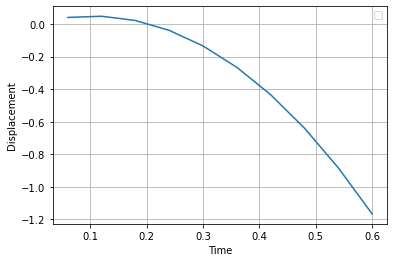

In [17]:
plt.plot(instantes, y1)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.grid(True)
plt.legend()
plt.show()

No handles with labels found to put in legend.


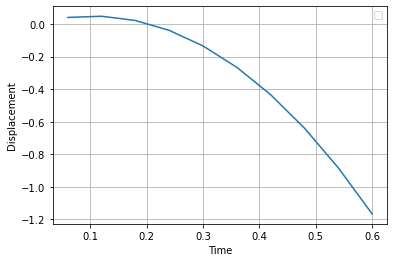

In [18]:
plt.plot(instantes, y2)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.grid(True)
plt.legend()
plt.show()

In [19]:
#Solução analítica

In [2]:
def mult(mat, vec):
    dim=len(mat)
    prod=[0.0+0.0j]*dim
    for i in range(dim):
        for j in range (dim):
            prod[i]=prod[i]+mat[i][j]*vec[j]
    return prod

In [3]:

#Solução analítica:
#Dada a matriz que eu mostrei, esses são os autovalores dela:
a1=-0.5j
a2=0.5j
a3=0.5*np.sqrt(3)*1.0j
a4=-0.5*np.sqrt(3)*1.0j
autovalores=[a1,a2,a3,a4]
#Esses são os autovetores:
u1=[1.0,1.0,a1,a1]
u2=[1.0,1.0,a2,a2]
u3=[1.0,-1.0,a3,-a3]
u4=[1.0,-1.0,a4,-a4]
#Essa é a base canônica em termos desses autovetores:
c=np.sqrt(3)/3+0.0j
x=[0.25,0.25,0.25,0.25]
y=[0.25,0.25,-0.25,-0.25]
z=[a2,a1,c*a1,c*a2]
w=[a2,a1,c*a2,c*a1]
#Por fim, a matriz de mudança de bases:
U=np.transpose([x,y,z,w])
#E a matriz de mudança de bases inversa:
V=np.transpose([u1,u2,u3,u4])
x_0=[0.0,0.0,1.0,1.0]
b=[0.0,0.0,-9.8,-9.8]
#Transformando b e x_0
xt=mult(U,x_0)
bt=mult(U,b)
sol=[0.0+0.0j]*4
t=0.6
h=t/10
y1=[0.0+0.0j]*10
y2=[0.0+0.0j]*10
pontos=[0.0]*10
for i in range(10):
    inst=(i+1)*h
    for j in range(4):
        aux=autovalores[j]
        sol[j]=cmath.exp(aux*inst)*xt[j]+((cmath.exp(aux*inst)-1)/aux)*bt[j]
    sol=mult(V,sol)
    y1[i]=sol[0]
    y2[i]=sol[1]
    pontos[i]=inst

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


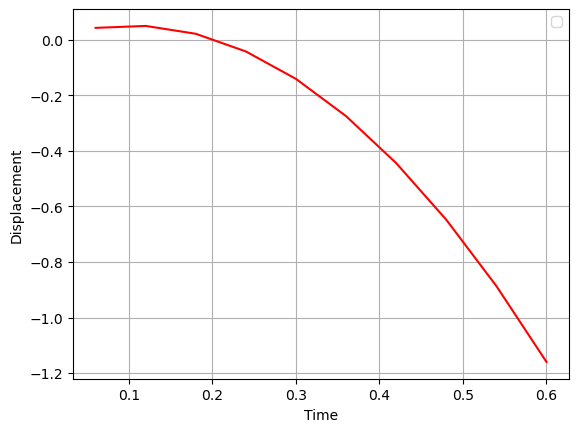

In [5]:
plt.plot(pontos, y1, color = 'red')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.grid(True)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


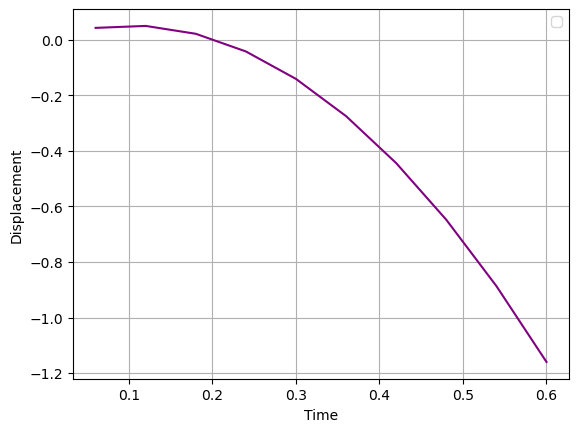

In [8]:
plt.plot(pontos, y2, color = 'purple')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.grid(True)
plt.legend()
plt.show()